## Try to predict UFC fights with statistical models 

In [60]:
import pandas as pd
#!pip install xgboost


In [124]:
df = pd.read_csv("ufc3.csv")
df.head()

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,1975-12-04,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,NaN,NaN,0.081855,NaN,NaN,NaN,0.081855,NaN,NaN,NaN


## This is the columns i will delete. we're trying to be unbias

In [125]:
def columndroper(df, colname):
    colname = str(colname)  # Ensure the column name is a string
    if colname in df.columns:
        df.drop(columns=colname, inplace=True)

columndroper(df, 'date')
columndroper(df, 'fight_url')
columndroper(df, 'event_url')
columndroper(df, 'fighter')
columndroper(df, 'opponent')
columndroper(df, 'referee')
columndroper(df, 'fighter_url')
columndroper(df, 'opponent_url')
columndroper(df, 'dob')
columndroper(df, 'time')
columndroper(df, 'total_comp_time')

In [126]:
df

,result,division,stance,method,round,time_format,reach,height,age,knockdowns,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
0,0,Open Weight,NaN,SUB,1,No Time Limit,NaN,72.0,46.0,0,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,1,Open Weight,Orthodox,SUB,1,No Time Limit,NaN,70.0,NaN,0,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2,0,Open Weight,NaN,SUB,1,No Time Limit,NaN,NaN,NaN,0,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
3,1,Open Weight,Orthodox,SUB,1,No Time Limit,NaN,74.0,58.0,0,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,0,Open Weight,NaN,KO/TKO,1,No Time Limit,NaN,77.0,NaN,0,...,NaN,NaN,0.081855,NaN,NaN,NaN,0.081855,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,1,Heavyweight,Orthodox,KO/TKO,2,5-5-5,79.0,76.0,33.0,0,...,1.178248,1.812958,0.557851,0.000000,0.743802,0.000000,0.774793,0.000000,1.033058,0.000000
13318,0,Welterweight,Orthodox,SUB,2,5-5-5,80.0,75.0,34.0,0,...,0.533333,0.600000,0.995168,1.021866,0.167001,0.066667,1.304373,1.331387,0.267336,0.066667
13319,1,Welterweight,Orthodox,SUB,2,5-5-5,77.0,73.0,27.0,0,...,0.186047,0.614618,0.835357,0.645581,1.113809,0.645581,1.515895,1.151628,2.021193,1.151628
13320,0,Lightweight,Orthodox,U-DEC,5,5-5-5-5-5,72.0,67.0,25.0,1,...,0.080000,0.177778,2.190916,2.529402,4.378803,4.458803,2.772149,3.194174,5.446126,5.566126


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Separate features and target
X = df.drop('result', axis=1)  # Features
y = df['result']  # Target variable

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')


Accuracy: 0.9058161350844278
ROC-AUC: 0.9059113011892904


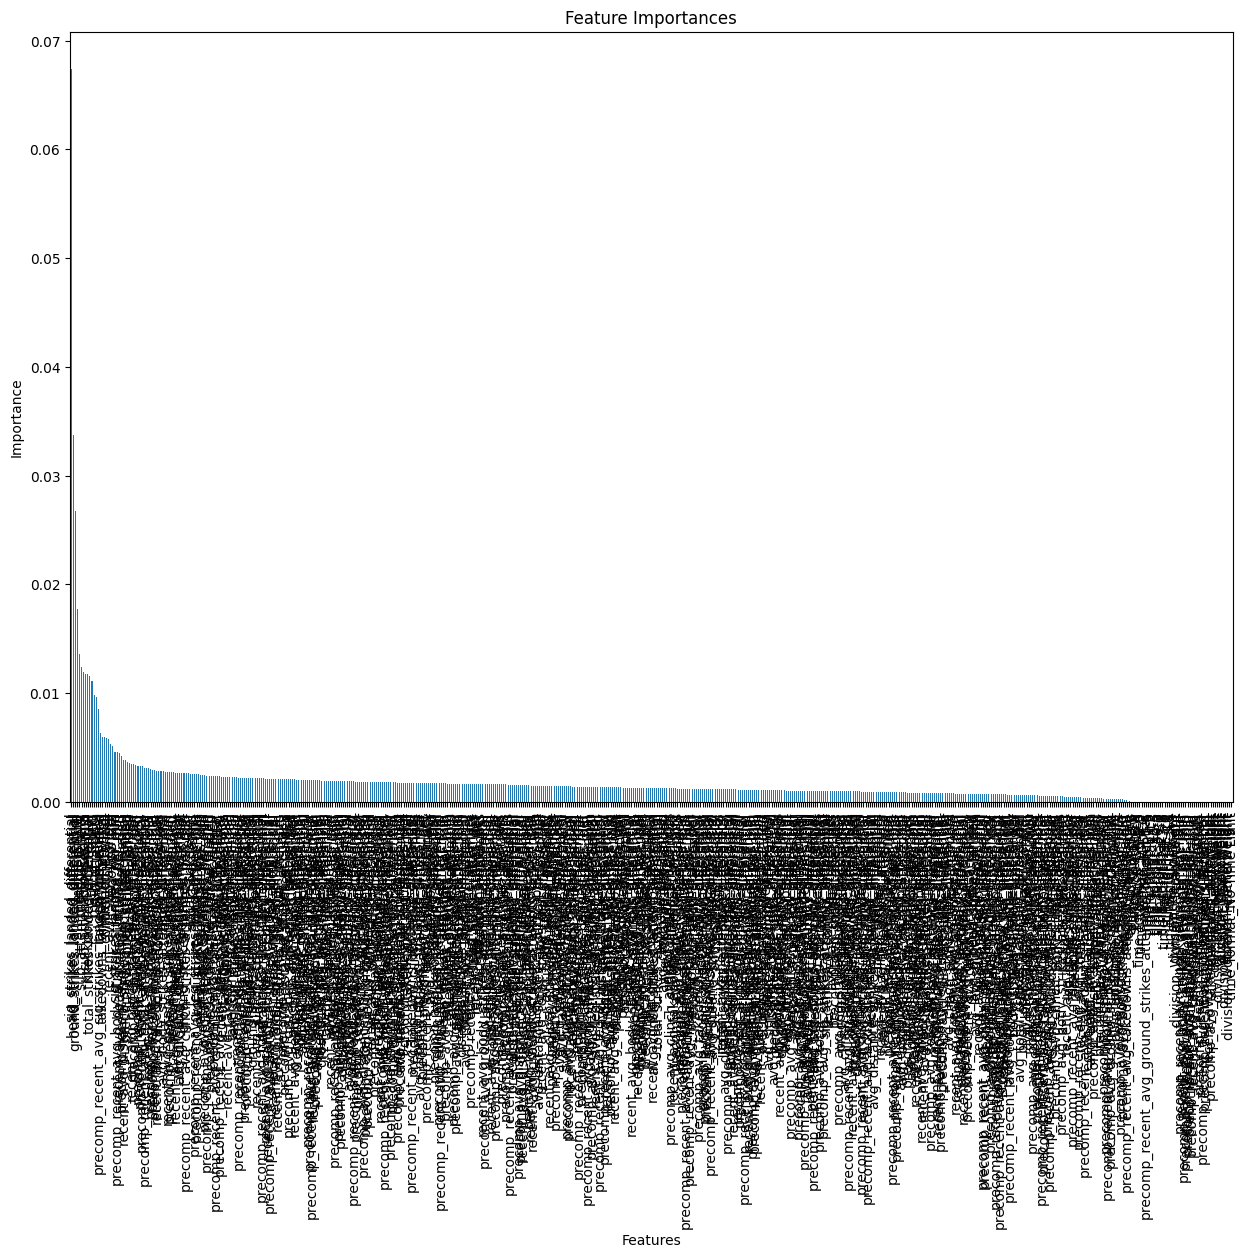

In [129]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = xgb_clf.feature_importances_

# Create a pandas series to hold the importances and index it with feature names
importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_importances = importances_series.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15,10))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## These are the top 30 most important variables

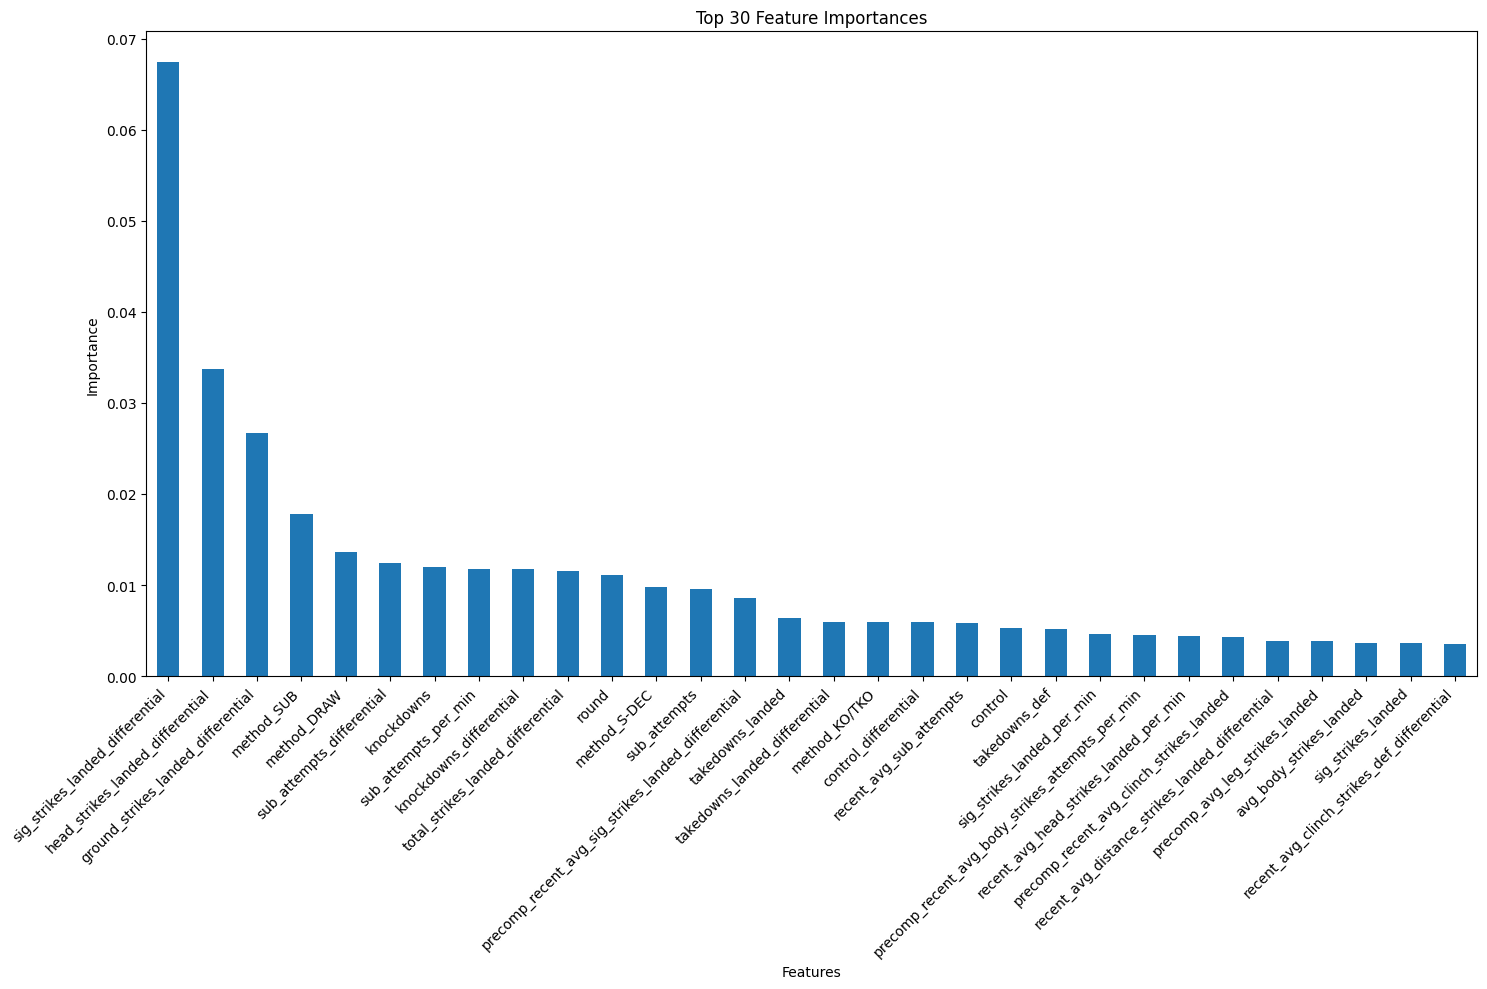

In [130]:
import matplotlib.pyplot as plt

# Assuming you have already calculated sorted_importances

# Select the top 30 features
top_30_importances = sorted_importances.head(30)

# Plotting the top 30 features
plt.figure(figsize=(15, 10))
top_30_importances.plot(kind='bar')
plt.title('Top 30 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()


## Now lets do predictive modeling just based of pre comp recent avarage

In [21]:
import pandas as pd

df = pd.read_csv("ufc3.csv")
df.head()

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,1975-12-04,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,NaN,NaN,0.081855,NaN,NaN,NaN,0.081855,NaN,NaN,NaN


In [22]:
def columndroper(df, colname):
    colname = str(colname)  # Ensure the column name is a string
    if colname in df.columns:
        df.drop(columns=colname, inplace=True)

columndroper(df, 'date')
columndroper(df, 'fight_url')
columndroper(df, 'event_url')
columndroper(df, 'fighter')
columndroper(df, 'opponent')
columndroper(df, 'referee')
columndroper(df, 'fighter_url')
columndroper(df, 'opponent_url')
columndroper(df, 'dob')
columndroper(df, 'time')
columndroper(df, 'total_comp_time')

## Below is the pre fight stats

In [23]:
df2 = df.filter(regex='^(precomp_avg_|recent_avg_)')

## now standardize the columns 

In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

float_cols = df2.select_dtypes(include=['float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the float columns and update the DataFrame
df2[float_cols] = scaler.fit_transform(df2[float_cols])

# Now, all float columns in df have been standardized


C:\Users\FY\AppData\Local\Temp\ipykernel_17124\588740734.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[float_cols] = scaler.fit_transform(df2[float_cols])


In [25]:
df2

,precomp_avg_knockdowns,recent_avg_knockdowns,precomp_avg_sub_attempts,recent_avg_sub_attempts,precomp_avg_reversals,recent_avg_reversals,precomp_avg_control,recent_avg_control,precomp_avg_takedowns_landed,recent_avg_takedowns_landed,...,precomp_avg_distance_strikes_attempts_per_min,recent_avg_distance_strikes_attempts_per_min,precomp_avg_clinch_strikes_landed_per_min,recent_avg_clinch_strikes_landed_per_min,precomp_avg_clinch_strikes_attempts_per_min,recent_avg_clinch_strikes_attempts_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,-0.773889,-0.747333,-0.780197,-0.743380,-0.532332,-0.521581,-0.341993,0.149960,-0.716916,0.175637,...,0.363878,-0.532209,0.950445,0.414275,0.933530,0.386661,-0.578994,-0.048231,-0.633016,-0.058592
13318,-0.537199,-0.747333,-0.424349,-0.743380,-0.273162,-0.521581,0.231129,-0.091346,0.684992,-0.101464,...,-0.043067,0.186259,0.114082,-0.203069,-0.016242,-0.289156,0.026685,-0.520683,-0.026968,-0.531983
13319,0.251769,0.276360,0.247809,0.456670,-0.532332,-0.521581,-0.372179,1.034748,-0.442859,0.175637,...,-0.584943,-1.026662,-0.287936,-0.545049,-0.273107,-0.653084,-0.196346,0.254838,-0.108794,0.552301
13320,-0.261060,1.300053,-0.780197,-0.743380,-0.532332,-0.521581,1.067170,0.163365,1.201485,-0.101464,...,-0.232951,-0.366800,-0.482572,-0.756524,-0.533963,-0.764212,0.920230,2.929161,0.820974,2.669690


In [26]:
df = pd.read_csv("ufc3.csv")

df1 = df[["result" , "division" , "stance" ,"method" ,"round" ,"time_format", "reach" , "height","age"]]

In [27]:
df1

,result,division,stance,method,round,time_format,reach,height,age
0,0,Open Weight,NaN,SUB,1,No Time Limit,NaN,72.0,46.0
1,1,Open Weight,Orthodox,SUB,1,No Time Limit,NaN,70.0,NaN
2,0,Open Weight,NaN,SUB,1,No Time Limit,NaN,NaN,NaN
3,1,Open Weight,Orthodox,SUB,1,No Time Limit,NaN,74.0,58.0
4,0,Open Weight,NaN,KO/TKO,1,No Time Limit,NaN,77.0,NaN
...,...,...,...,...,...,...,...,...,...
13317,1,Heavyweight,Orthodox,KO/TKO,2,5-5-5,79.0,76.0,33.0
13318,0,Welterweight,Orthodox,SUB,2,5-5-5,80.0,75.0,34.0
13319,1,Welterweight,Orthodox,SUB,2,5-5-5,77.0,73.0,27.0
13320,0,Lightweight,Orthodox,U-DEC,5,5-5-5-5-5,72.0,67.0,25.0


In [28]:
newdf = pd.concat([df1,df2], axis=1)

## The below dataframe contains Pre competition data only 

In [29]:
newdf

,result,division,stance,method,round,time_format,reach,height,age,precomp_avg_knockdowns,...,precomp_avg_distance_strikes_attempts_per_min,recent_avg_distance_strikes_attempts_per_min,precomp_avg_clinch_strikes_landed_per_min,recent_avg_clinch_strikes_landed_per_min,precomp_avg_clinch_strikes_attempts_per_min,recent_avg_clinch_strikes_attempts_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min
0,0,Open Weight,NaN,SUB,1,No Time Limit,NaN,72.0,46.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Open Weight,Orthodox,SUB,1,No Time Limit,NaN,70.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Open Weight,NaN,SUB,1,No Time Limit,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Open Weight,Orthodox,SUB,1,No Time Limit,NaN,74.0,58.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Open Weight,NaN,KO/TKO,1,No Time Limit,NaN,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,1,Heavyweight,Orthodox,KO/TKO,2,5-5-5,79.0,76.0,33.0,-0.773889,...,0.363878,-0.532209,0.950445,0.414275,0.933530,0.386661,-0.578994,-0.048231,-0.633016,-0.058592
13318,0,Welterweight,Orthodox,SUB,2,5-5-5,80.0,75.0,34.0,-0.537199,...,-0.043067,0.186259,0.114082,-0.203069,-0.016242,-0.289156,0.026685,-0.520683,-0.026968,-0.531983
13319,1,Welterweight,Orthodox,SUB,2,5-5-5,77.0,73.0,27.0,0.251769,...,-0.584943,-1.026662,-0.287936,-0.545049,-0.273107,-0.653084,-0.196346,0.254838,-0.108794,0.552301
13320,0,Lightweight,Orthodox,U-DEC,5,5-5-5-5-5,72.0,67.0,25.0,-0.261060,...,-0.232951,-0.366800,-0.482572,-0.756524,-0.533963,-0.764212,0.920230,2.929161,0.820974,2.669690


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

columns_to_standardize = ['height', 'reach', 'age']

# Initialize the StandardScaler
scaler = MinMaxScaler()
newdf[columns_to_standardize] = scaler.fit_transform(newdf[columns_to_standardize])


In [31]:
newdf

,result,division,stance,method,round,time_format,reach,height,age,precomp_avg_knockdowns,...,precomp_avg_distance_strikes_attempts_per_min,recent_avg_distance_strikes_attempts_per_min,precomp_avg_clinch_strikes_landed_per_min,recent_avg_clinch_strikes_landed_per_min,precomp_avg_clinch_strikes_attempts_per_min,recent_avg_clinch_strikes_attempts_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min
0,0,Open Weight,NaN,SUB,1,No Time Limit,NaN,0.521739,0.431034,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Open Weight,Orthodox,SUB,1,No Time Limit,NaN,0.434783,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Open Weight,NaN,SUB,1,No Time Limit,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Open Weight,Orthodox,SUB,1,No Time Limit,NaN,0.608696,0.637931,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Open Weight,NaN,KO/TKO,1,No Time Limit,NaN,0.739130,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,1,Heavyweight,Orthodox,KO/TKO,2,5-5-5,0.807692,0.695652,0.206897,-0.773889,...,0.363878,-0.532209,0.950445,0.414275,0.933530,0.386661,-0.578994,-0.048231,-0.633016,-0.058592
13318,0,Welterweight,Orthodox,SUB,2,5-5-5,0.846154,0.652174,0.224138,-0.537199,...,-0.043067,0.186259,0.114082,-0.203069,-0.016242,-0.289156,0.026685,-0.520683,-0.026968,-0.531983
13319,1,Welterweight,Orthodox,SUB,2,5-5-5,0.730769,0.565217,0.103448,0.251769,...,-0.584943,-1.026662,-0.287936,-0.545049,-0.273107,-0.653084,-0.196346,0.254838,-0.108794,0.552301
13320,0,Lightweight,Orthodox,U-DEC,5,5-5-5-5-5,0.538462,0.304348,0.068966,-0.261060,...,-0.232951,-0.366800,-0.482572,-0.756524,-0.533963,-0.764212,0.920230,2.929161,0.820974,2.669690


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Separate features and target
X = newdf.drop('result', axis=1)  # Features
y = newdf['result']  # Target variable

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20)

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')


Accuracy: 0.7136960600375235
ROC-AUC: 0.7138814450350716


## lets use regularization

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

# Define a set of regularization strengths to try
regularization_strengths = [0.001, 0.01, 0.1, 1, 10,15, 30 ,40,50, 60]

# Initialize lists to store the results for each regularization setting
results = []

for reg_strength in regularization_strengths:
    # Initialize XGBClassifier with specific regularization settings
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                reg_alpha=reg_strength,  # L1 regularization
                                reg_lambda=reg_strength)  # L2 regularization simultaneously

    xgb_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_clf.predict(X_test)
    y_proba = xgb_clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Store the results
    results.append({'reg_strength': reg_strength, 'accuracy': accuracy, 'roc_auc': roc_auc})

# Print the results
for result in results:
    print(f"Reg Strength: {result['reg_strength']}, Accuracy: {result['accuracy']:.4f}, ROC-AUC: {result['roc_auc']:.4f}")


Reg Strength: 0.001, Accuracy: 0.7178, ROC-AUC: 0.8068
Reg Strength: 0.01, Accuracy: 0.7062, ROC-AUC: 0.7960
Reg Strength: 0.1, Accuracy: 0.7081, ROC-AUC: 0.7913
Reg Strength: 1, Accuracy: 0.7186, ROC-AUC: 0.8068
Reg Strength: 10, Accuracy: 0.7298, ROC-AUC: 0.8230
Reg Strength: 15, Accuracy: 0.7366, ROC-AUC: 0.8246
Reg Strength: 30, Accuracy: 0.7411, ROC-AUC: 0.8266
Reg Strength: 40, Accuracy: 0.7328, ROC-AUC: 0.8238
Reg Strength: 50, Accuracy: 0.7313, ROC-AUC: 0.8185
Reg Strength: 60, Accuracy: 0.7253, ROC-AUC: 0.8087


In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
import numpy as np


best_model_index = np.argmax([result['roc_auc'] for result in results])
best_model_reg_strength = results[best_model_index]['reg_strength']

# Train the best model again to access its feature importances
best_xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                 reg_alpha=best_model_reg_strength,
                                 reg_lambda=best_model_reg_strength)
best_xgb_clf.fit(X_train, y_train)

# Get feature importances
feature_importances = best_xgb_clf.feature_importances_

# Assuming X_train has column names, create a series for better visualization
importance_series = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances for the Best Model (Reg Strength: {})".format(best_model_reg_strength))
print(importance_series)


Feature Importances for the Best Model (Reg Strength: 30)
recent_avg_sig_strikes_landed_differential       0.069520
recent_avg_total_strikes_landed_differential     0.042958
recent_avg_ground_strikes_landed_differential    0.030021
recent_avg_head_strikes_landed_differential      0.023625
recent_avg_knockdowns_differential               0.020174
                                                   ...   
recent_avg_body_strikes_landed_per_min           0.000000
division_Women's Strawweight                     0.000000
stance_Orthodox                                  0.000000
stance_Sideways                                  0.000000
time_format_No Time Limit                        0.000000
Length: 250, dtype: float32
